In [71]:

from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shap 


from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shap 
import lightgbm as lgb

from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shap 
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor

from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shap 
import lightgbm as lgb
from xgboost import XGBRegressor

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder

In [72]:
feature_groups = {
    "Demographic Information": [
        "age_03", "age_12", "urban_03", "urban_12", "married_03", "married_12",
        "n_mar_03", "n_mar_12", "ragender", "sgender_03", "sgender_12"
    ],
    "Socioeconomic Status": [
        "edu_gru_03", "edu_gru_12", "employment_03", "employment_12", "rearnings_03",
        "rearnings_12", "searnings_03", "searnings_12", "hincome_03", "hincome_12",
        "hinc_business_03", "hinc_business_12", "hinc_rent_03", "hinc_rent_12",
        "hinc_assets_03", "hinc_assets_12", "hinc_cap_03", "hinc_cap_12",
        "rinc_pension_03", "rinc_pension_12", "sinc_pension_03", "sinc_pension_12",
        "hincome_change", "edu_gru_change"
    ],
    "Health and Physical Limitations": [
        "glob_hlth_03", "glob_hlth_12", "adl_dress_03", "adl_dress_12", "adl_walk_03",
        "adl_walk_12", "adl_bath_03", "adl_bath_12", "adl_eat_03", "adl_eat_12",
        "adl_bed_03", "adl_bed_12", "adl_toilet_03", "adl_toilet_12", "n_adl_03",
        "n_adl_12", "iadl_money_03", "iadl_money_12", "iadl_meds_03", "iadl_meds_12",
        "iadl_shop_03", "iadl_shop_12", "iadl_meals_03", "iadl_meals_12", "n_iadl_03",
        "n_iadl_12", "hypertension_03", "hypertension_12", "diabetes_03", "diabetes_12",
        "resp_ill_03", "resp_ill_12", "arthritis_03", "arthritis_12", "hrt_attack_03",
        "hrt_attack_12", "stroke_03", "stroke_12", "cancer_03", "cancer_12",
        "n_illnesses_03", "n_illnesses_12", "bmi_03", "bmi_12", "niadl_change", "adl_change",
        "glob_hlth_change", "bmi_change", "illnesses_change", "vax_flu_12", "vax_pneu_12"
    ],
    "Mental Health and Well-being": [
        "depressed_03", "depressed_12", "hard_03", "hard_12", "restless_03",
        "restless_12", "happy_03", "happy_12", "lonely_03", "lonely_12", "enjoy_03",
        "enjoy_12", "sad_03", "sad_12", "tired_03", "tired_12", "energetic_03",
        "energetic_12", "n_depr_03", "n_depr_12", "cesd_depressed_03", "cesd_depressed_12", "depr_change",
    ],
    "Lifestyle and Behavior": [
        "exer_3xwk_03", "exer_3xwk_12", "alcohol_03", "alcohol_12", "tobacco_03",
        "tobacco_12", "test_chol_03", "test_chol_12", "test_tuber_03", "test_tuber_12",
        "test_diab_03", "test_diab_12", "test_pres_03", "test_pres_12", "hosp_03",
        "hosp_12", "visit_med_03", "visit_med_12", "out_proc_03", "out_proc_12",
        "visit_dental_03", "visit_dental_12"
    ],
    "Social and Family Dynamics": [
        "n_living_child_03", "n_living_child_12", "migration_03", "migration_12",
        "decis_famil_03", "decis_famil_12", "decis_personal_03", "decis_personal_12",
        "care_adult_12", "care_child_12", "volunteer_12", "attends_class_12",
        "attends_club_12", "reads_12", "games_12", "table_games_12", "comms_tel_comp_12",
        "act_mant_12", "tv_12", "sewing_12", "satis_ideal_12", "satis_excel_12",
        "satis_fine_12", "cosas_imp_12", "wouldnt_change_12", "memory_12", "rrelgimp_03",
        "rrelgimp_12", "rrfcntx_m_12", "rsocact_m_12", "rrelgwk_12"
    ],
    "Health Insurance and Coverage": [
        "imss_03", "imss_12", "issste_03", "issste_12", "pem_def_mar_03", "pem_def_mar_12",
        "insur_private_03", "insur_private_12", "insur_other_03", "insur_other_12",
        "seg_pop_12", "insured_03", "insured_12"
    ],
    "Migration and U.S. Experience": [
        "a16a_12", "a21_12", "a22_12", "a33b_12", "a34_12"
    ],
    "Housing and Environment": [
        "j11_12"
    ],
    "Parental Education": [
        "rameduc_m", "rafeduc_m"
    ],
    "Employment and Job History": [
        "rjob_hrswk_03", "rjob_hrswk_12", "rjlocc_m_03", "rjlocc_m_12", "rjob_end_03",
        "rjob_end_12", "rjobend_reason_03", "rjobend_reason_12", "rjob_hrswk_change",
        "max_work_year", "years_since_work"
    ],
    "year": [
        "year"
    ]
}

total_features = sum(len(features) for features in feature_groups.values())
print(f"Total number of features: {total_features}")


Total number of features: 195


In [73]:
# create new features by combining 2003 and 2012 scores and numbering ordinal variables
def feature_engineering(data):
    data['rjob_hrswk_change'] = (data['rjob_hrswk_12'] - data['rjob_hrswk_03']).astype(float)
    data['max_work_year']=data[['rjob_end_12','rjob_end_03']].max(axis=1).astype(float)
    data['years_since_work']=(data['year']-data['max_work_year']).astype(float)
    data['hincome_change']=(data['hincome_12']-data['hincome_03']).astype(float)
    data['niadl_change']=(data['n_iadl_12']-data['n_iadl_03']).astype(float)
    data['adl_change']=(data['n_adl_12']-data['n_adl_03']).astype(float)
    data['depr_change']=(data['n_depr_12']-data['n_depr_03']).astype(float)
    data['glob_hlth_03']=data['glob_hlth_03'].replace({'5. Poor':0, '4. Fair':1, '3. Good':2, '2. Very good': 3, '1. Excellent':4}).astype(float)
    data['glob_hlth_12']=data['glob_hlth_12'].replace({'5. Poor':0, '4. Fair':1, '3. Good':2, '2. Very good': 3, '1. Excellent':4}).astype(float)
    data['glob_hlth_change']=(data['glob_hlth_12']-data['glob_hlth_03']).astype(float)
    data['bmi_03']=data['bmi_03'].replace({'1. Underweight': 1, '2. Normal weight': 2, '3. Overweight':3, '4. Obese':4, '5. Morbidly obese':5}).astype(float)
    data['bmi_12']=data['bmi_12'].replace({'1. Underweight': 1, '2. Normal weight': 2, '3. Overweight':3, '4. Obese':4, '5. Morbidly obese':5}).astype(float)
    data['bmi_change']=(data['bmi_12']-data['bmi_03']).astype(float)
    data['employment_03']=data['employment_03'].replace({'1. Currently Working': 'Working', '2. Currently looking for work':'Looking for work', '3. Dedicated to household chores': 'House', '4. Retired, incapacitated, or does not work': 'No work'})
    data['employment_12']=data['employment_12'].replace({'1. Currently Working': 'Working', '2. Currently looking for work':'Looking for work', '3. Dedicated to household chores': 'House', '4. Retired, incapacitated, or does not work': 'No work'})
    data['memory_12']=data['memory_12'].replace({'5. Poor':0, '4. Fair':1, '3. Good':2, '2. Very good': 3, '1. Excellent':4}).astype(float)
    data['edu_gru_03']=data['edu_gru_03'].replace({'0. No education':0,'1. 1–5 years':1, '2. 6 years':2, '3. 7–9 years':3,'4. 10+ years':4}).astype(float)
    data['edu_gru_12']=data['edu_gru_12'].replace({'0. No education':0,'1. 1–5 years':1, '2. 6 years':2, '3. 7–9 years':3,'4. 10+ years':4}).astype(float)
    data['edu_gru_change']=(data['edu_gru_12']-data['edu_gru_03']).astype(float)
    data['illnesses_change']=(data['n_illnesses_12']-data['n_illnesses_03']).astype(float)
    return data

def get_cat_cols(data):
    # Get the columns with object datatype
    cat_columns=[]
    dummies=[]
    for col in data.columns:
        if data[col].dtype=='object' and 'uid' not in col:
            cat_columns.append(col)
            dummies.append(col)
        elif data[col].dtype!='object' and 'uid' not in col and (data[col].max()==1.0):
            cat_columns.append(col)
            data[col].fillna(0, inplace=True)
        else:
            continue
    return cat_columns, dummies

def encode_cat_cols(train_data, cat_cols, dummy_cols):
    enc = OneHotEncoder()
    enc.fit(train_data[dummy_cols])
    encoded_train_data=enc.transform(train_data[dummy_cols]).toarray()
    feature_names = enc.get_feature_names_out(dummy_cols)
    train_data.drop(columns=dummy_cols, inplace=True)
    encoded_train_df = pd.DataFrame(encoded_train_data, columns=feature_names)
    train_data[feature_names]=encoded_train_df[feature_names]
    return train_data, feature_names

In [74]:
#data
train=pd.read_csv("/u/spa-d4/grad/mfe261/Projects/PREPARE/dataset/train_features.csv")
y=pd.read_csv("/u/spa-d4/grad/mfe261/Projects/PREPARE/dataset/train_labels.csv")
test=pd.read_csv("/u/spa-d4/grad/mfe261/Projects/PREPARE/dataset/test_features.csv")
test_ground_truth=pd.read_csv("/u/spa-d4/grad/mfe261/Projects/PREPARE/dataset/sdoh_test_labels.csv")

#let merge train and label
main_df = pd.merge(train, y, on='uid', how='left')

#lets merged test AND sample submission
test_df = pd.merge(test, test_ground_truth, on='uid', how='left')

y=main_df['composite_score']
y_test=test_df['composite_score']
data=pd.concat((main_df,test_df)).reset_index(drop=True).copy()
data = feature_engineering(data)
data=data.drop(columns=['composite_score', 'uid'],axis=1)

# Get the columns with object datatype
object_cols = data.select_dtypes(include=['object']).columns

# Convert the object columns to category dtype
for col in object_cols:
    data[col] = pd.Categorical(data[col].fillna("Missing"))
    
#separate train and test
main_df=data[:len(main_df)]
test_df=data[len(main_df):]

/tmp/ipykernel_1696223/145228375.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['glob_hlth_03']=data['glob_hlth_03'].replace({'5. Poor':0, '4. Fair':1, '3. Good':2, '2. Very good': 3, '1. Excellent':4}).astype(float)
/tmp/ipykernel_1696223/145228375.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['glob_hlth_12']=data['glob_hlth_12'].replace({'5. Poor':0, '4. Fair':1, '3. Good':2, '2. Very good': 3, '1. Excellent':4}).astype(float)
/tmp/ipykernel_1696223/145228375.py:13: FutureWarning: Downcasting behavior in `

## LighGBoost ##

In [75]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(main_df, y, test_size=0.001, random_state=42)

# Best parameters for CatBoost
best_params = {
  'learning_rate': 0.07089438962267576,
  'num_leaves': 49,
  'max_depth': 4,
  'feature_fraction': 0.4839642718097913,
  'bagging_fraction': 0.5497799156909652,
  'lambda_l1': 0.058207015936292725,
  'lambda_l2': 0.08350139961819975,
  'min_child_samples': 85,
  'n_estimators': 4077,
  'objective': 'regression',
  'metric': 'rmse',
  'random_state': 42
}

model2 = lgb.train(
    params=best_params,
    train_set=lgb.Dataset(X_train, label=y_train, categorical_feature='auto'),
    valid_sets=lgb.Dataset(X_val, label=y_val, categorical_feature='auto'),
    num_boost_round=best_params['n_estimators'],
    callbacks=[
        lgb.early_stopping(stopping_rounds=500, verbose=True),
    ]
)

/u/spa-d4/grad/mfe261/Projects/PREPARE/envs/lib/python3.9/site-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003818 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2006
[LightGBM] [Info] Number of data points in the train set: 4338, number of used features: 193
[LightGBM] [Info] Start training from score 157.040341
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 500 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh


Mean Squared Error: 39.4487
R^2 Score: 0.6112


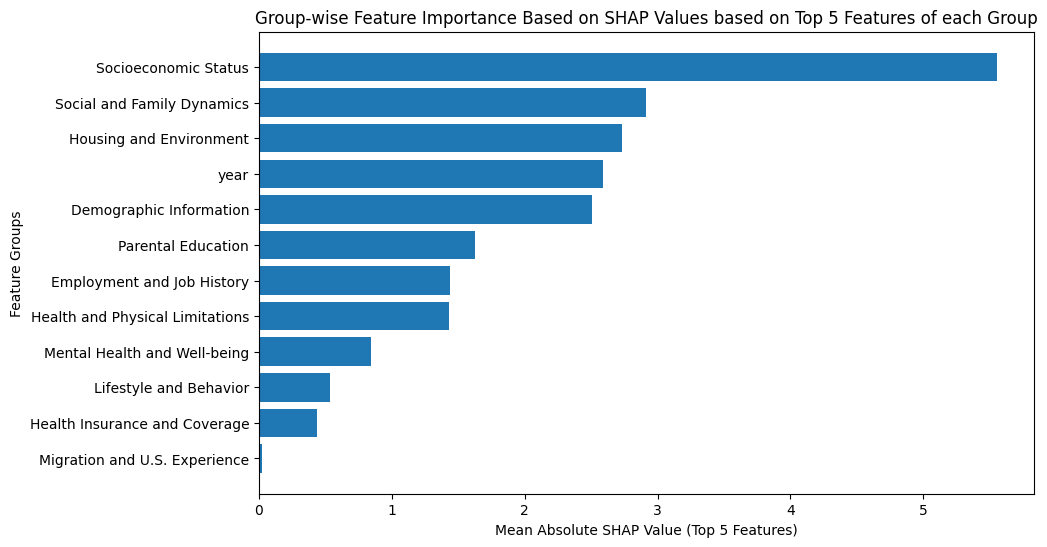

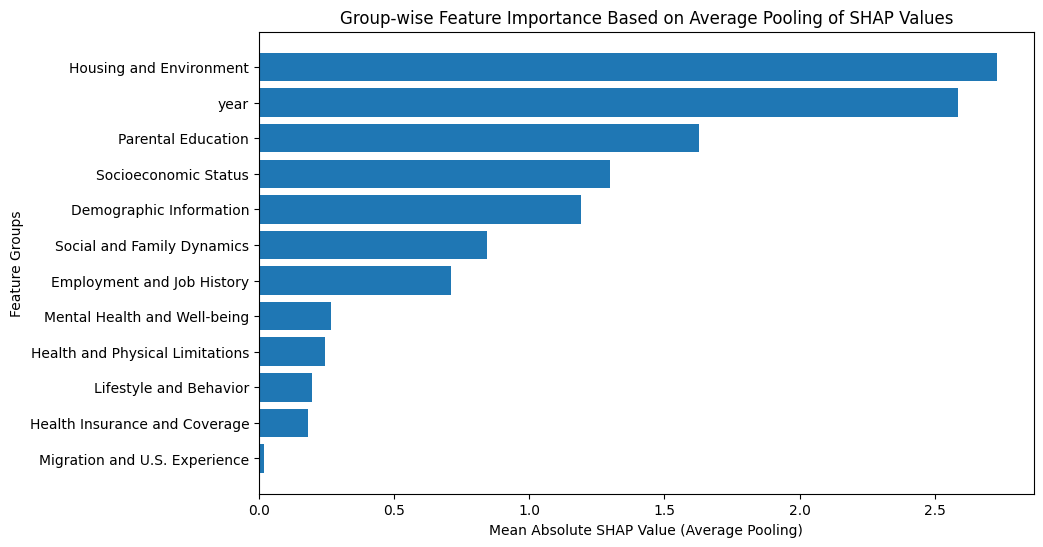

In [76]:
# Make predictions
y_pred = model2.predict(test_df)
y_pred = np.round(y_pred).astype(int)

# Calculate metrics
mse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")


explainer = shap.TreeExplainer(model2)
shap_values_lgb = explainer.shap_values(test_df)

main_df_columns = main_df.columns.to_list()
feature_indices = {
    group: [main_df_columns.index(feature) for feature in features if feature in main_df_columns]
    for group, features in feature_groups.items()
}

# Calculate mean absolute SHAP values for top 5 features in each group
group_means = {}
for group_name, indices in feature_indices.items():
    group_shap_values = shap_values_lgb[:, indices]  # Extract SHAP values for the group
    mean_abs_shap_values = np.mean(np.abs(group_shap_values), axis=0)  # Mean absolute SHAP values
    top_5_mean_abs = np.sort(mean_abs_shap_values)[-5:]  # Top 5 highest values
    group_means[group_name] = np.mean(top_5_mean_abs)  # Mean of the top 5 values
    
# Plot the group importance
group_names = list(group_means.keys())
group_importance = list(group_means.values())

# Sort the groups by their importance values
sorted_groups = sorted(zip(group_importance, group_names))
group_importance, group_names = zip(*sorted_groups)

plt.figure(figsize=(10, 6))
plt.barh(group_names, group_importance)
plt.xlabel("Mean Absolute SHAP Value (Top 5 Features)")
plt.ylabel("Feature Groups")
plt.title("Group-wise Feature Importance Based on SHAP Values based on Top 5 Features of each Group")
plt.show()
    
# Calculate average pooling of the SHAP values for each group
group_avg_pooling = {}
for group_name, indices in feature_indices.items():
    group_shap_values = shap_values_lgb[:, indices]  # Extract SHAP values for the group
    avg_pooling_shap_values = np.mean(np.abs(group_shap_values), axis=1)  # Average pooling (mean of SHAP values for each patient)
    group_avg_pooling[group_name] = np.mean(avg_pooling_shap_values)  # Mean of pooled values for the group


# Plot the group importance
group_names = list(group_avg_pooling.keys())
group_importance = list(group_avg_pooling.values())

# Sort the groups by their importance values
sorted_groups = sorted(zip(group_importance, group_names))
group_importance, group_names = zip(*sorted_groups)

plt.figure(figsize=(10, 6))
plt.barh(group_names, group_importance)
plt.xlabel("Mean Absolute SHAP Value (Average Pooling)")
plt.ylabel("Feature Groups")
plt.title("Group-wise Feature Importance Based on Average Pooling of SHAP Values")
plt.show()

## CatBoost ##

In [77]:
X_train, X_val, y_train, y_val = train_test_split(main_df, y, test_size=0.001, random_state=42)


# Best parameters for CatBoost
best_params = {
    'depth': 6,
    'learning_rate': 0.025804617832891515,
    'l2_leaf_reg': 0.22567510948252656,
    'random_strength': 1.8064759944089426,
    'bagging_temperature': 0.4675254776654324,
    'iterations': 1224
}

# Initialize and train CatBoostRegressor
# categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.to_list()
model2 = CatBoostRegressor(
    **best_params,
    loss_function='RMSE',
    cat_features=main_df.select_dtypes(include=['object', 'category']).columns.to_list(),
    verbose=100,
    early_stopping_rounds=500,
    random_state=42
)
model2.fit(X_train, y_train, eval_set=(X_val, y_val))

0:	learn: 60.2328742	test: 70.2511139	best: 70.2511139 (0)	total: 8.07ms	remaining: 9.87s
100:	learn: 41.3925974	test: 46.7546765	best: 46.7546765 (100)	total: 1.1s	remaining: 12.2s
200:	learn: 38.6240108	test: 40.1624675	best: 40.1624675 (200)	total: 1.86s	remaining: 9.47s
300:	learn: 37.1348037	test: 37.3507143	best: 37.3403904 (299)	total: 2.91s	remaining: 8.92s
400:	learn: 35.6643537	test: 36.6687054	best: 36.5536159 (398)	total: 3.78s	remaining: 7.76s
500:	learn: 34.1788256	test: 35.7284741	best: 35.2541153 (468)	total: 4.75s	remaining: 6.86s
600:	learn: 33.0934189	test: 35.5874344	best: 35.2541153 (468)	total: 5.63s	remaining: 5.84s
700:	learn: 32.0378928	test: 35.0526244	best: 34.9646090 (677)	total: 6.48s	remaining: 4.84s
800:	learn: 31.0457357	test: 35.5191549	best: 34.9508528 (706)	total: 7.63s	remaining: 4.03s
900:	learn: 30.1705533	test: 36.0567949	best: 34.9508528 (706)	total: 8.48s	remaining: 3.04s
1000:	learn: 29.3678066	test: 36.1936538	best: 34.9508528 (706)	total: 9.3


Mean Squared Error: 39.2980
R^2 Score: 0.6142


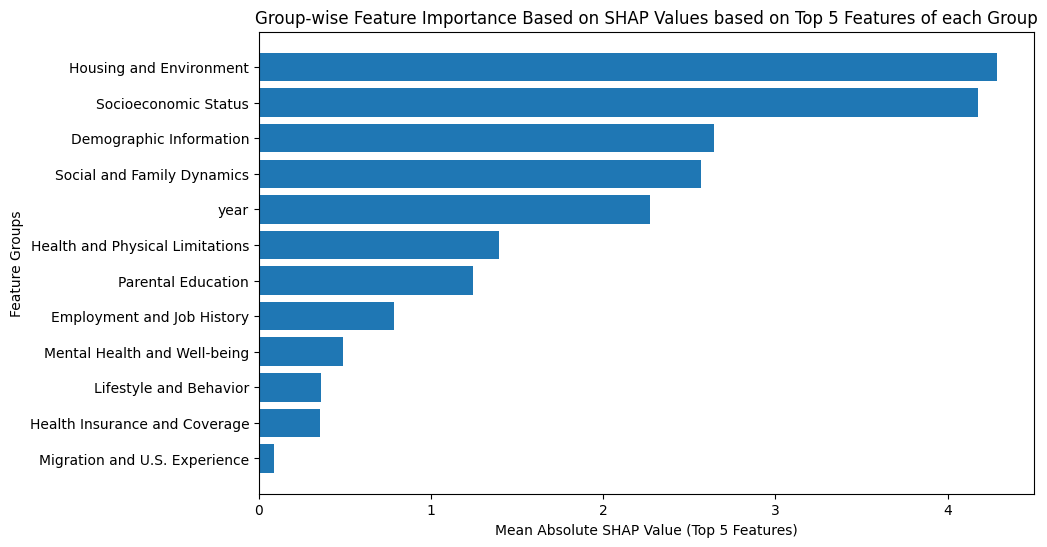

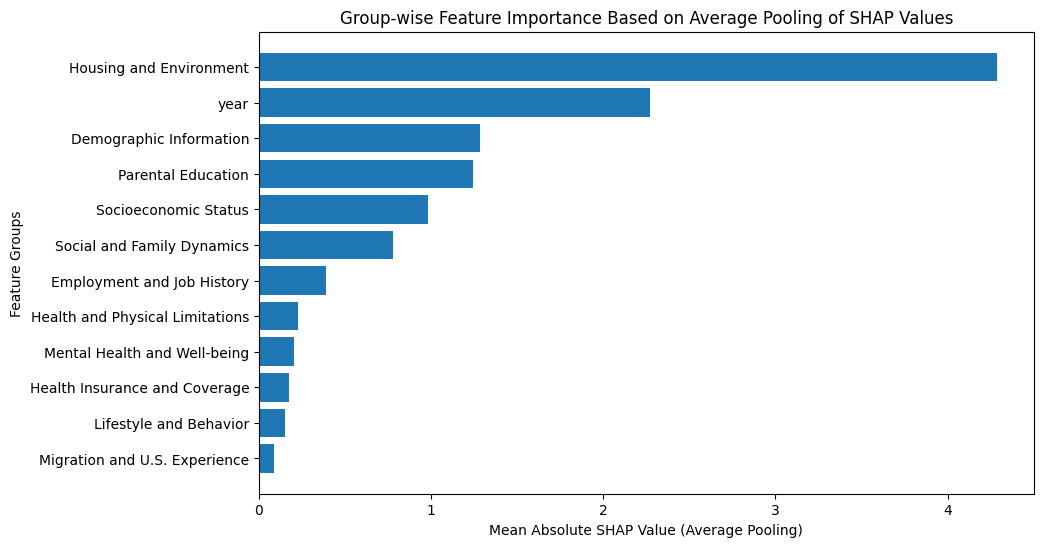

In [78]:
# Make predictions
y_pred = model2.predict(test_df)
y_pred = np.round(y_pred).astype(int)

# Calculate metrics
mse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")


explainer = shap.TreeExplainer(model2)
shap_values_catboost = explainer.shap_values(test_df)

main_df_columns = main_df.columns.to_list()
feature_indices = {
    group: [main_df_columns.index(feature) for feature in features if feature in main_df_columns]
    for group, features in feature_groups.items()
}

# Calculate mean absolute SHAP values for top 5 features in each group
group_means = {}
for group_name, indices in feature_indices.items():
    group_shap_values = shap_values_catboost[:, indices]  # Extract SHAP values for the group
    mean_abs_shap_values = np.mean(np.abs(group_shap_values), axis=0)  # Mean absolute SHAP values
    top_5_mean_abs = np.sort(mean_abs_shap_values)[-5:]  # Top 5 highest values
    group_means[group_name] = np.mean(top_5_mean_abs)  # Mean of the top 5 values
    
# Plot the group importance
group_names = list(group_means.keys())
group_importance = list(group_means.values())

# Sort the groups by their importance values
sorted_groups = sorted(zip(group_importance, group_names))
group_importance, group_names = zip(*sorted_groups)

plt.figure(figsize=(10, 6))
plt.barh(group_names, group_importance)
plt.xlabel("Mean Absolute SHAP Value (Top 5 Features)")
plt.ylabel("Feature Groups")
plt.title("Group-wise Feature Importance Based on SHAP Values based on Top 5 Features of each Group")
plt.show()
    
# Calculate average pooling of the SHAP values for each group
group_avg_pooling = {}
for group_name, indices in feature_indices.items():
    group_shap_values = shap_values_catboost[:, indices]  # Extract SHAP values for the group
    avg_pooling_shap_values = np.mean(np.abs(group_shap_values), axis=1)  # Average pooling (mean of SHAP values for each patient)
    group_avg_pooling[group_name] = np.mean(avg_pooling_shap_values)  # Mean of pooled values for the group


# Plot the group importance
group_names = list(group_avg_pooling.keys())
group_importance = list(group_avg_pooling.values())

# Sort the groups by their importance values
sorted_groups = sorted(zip(group_importance, group_names))
group_importance, group_names = zip(*sorted_groups)

plt.figure(figsize=(10, 6))
plt.barh(group_names, group_importance)
plt.xlabel("Mean Absolute SHAP Value (Average Pooling)")
plt.ylabel("Feature Groups")
plt.title("Group-wise Feature Importance Based on Average Pooling of SHAP Values")
plt.show()

## XGBoost ##

In [79]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(main_df, y, test_size=0.001, random_state=42)

# Best parameters for XGBoost
best_params = {
  'learning_rate': 0.033763045458285304,
  'max_depth': 3,
  'min_child_weight': 14,
  'subsample': 0.9500263286639197,
  'colsample_bytree': 0.7747635615654157,
  'gamma': 7.558507636378349,
  'reg_alpha': 0.4378783168336932,
  'reg_lambda': 2.8408676886824322,
  'n_estimators': 2804
  }


model2 = XGBRegressor(**best_params, random_state=42, enable_categorical=True, early_stopping_rounds=500, eval_metric=root_mean_squared_error,)
model2.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=True)

[0]	validation_0-rmse:70.07182	validation_0-root_mean_squared_error:70.07182
[1]	validation_0-rmse:69.23374	validation_0-root_mean_squared_error:69.23374
[2]	validation_0-rmse:68.45840	validation_0-root_mean_squared_error:68.45840
[3]	validation_0-rmse:67.58054	validation_0-root_mean_squared_error:67.58054
[4]	validation_0-rmse:66.75906	validation_0-root_mean_squared_error:66.75906
[5]	validation_0-rmse:66.06690	validation_0-root_mean_squared_error:66.06690
[6]	validation_0-rmse:65.32407	validation_0-root_mean_squared_error:65.32407
[7]	validation_0-rmse:64.73959	validation_0-root_mean_squared_error:64.73959
[8]	validation_0-rmse:64.16536	validation_0-root_mean_squared_error:64.16536
[9]	validation_0-rmse:63.64817	validation_0-root_mean_squared_error:63.64817
[10]	validation_0-rmse:62.84326	validation_0-root_mean_squared_error:62.84326
[11]	validation_0-rmse:62.38333	validation_0-root_mean_squared_error:62.38332
[12]	validation_0-rmse:61.80279	validation_0-root_mean_squared_error:61.80

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7747635615654157, device=None,
             early_stopping_rounds=500, enable_categorical=True,
             eval_metric=<function root_mean_squared_error at 0x7fd5bff33a60>,
             feature_types=None, gamma=7.558507636378349, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.033763045458285304, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=14, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2804, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)


Mean Squared Error: 39.6704
R^2 Score: 0.6069


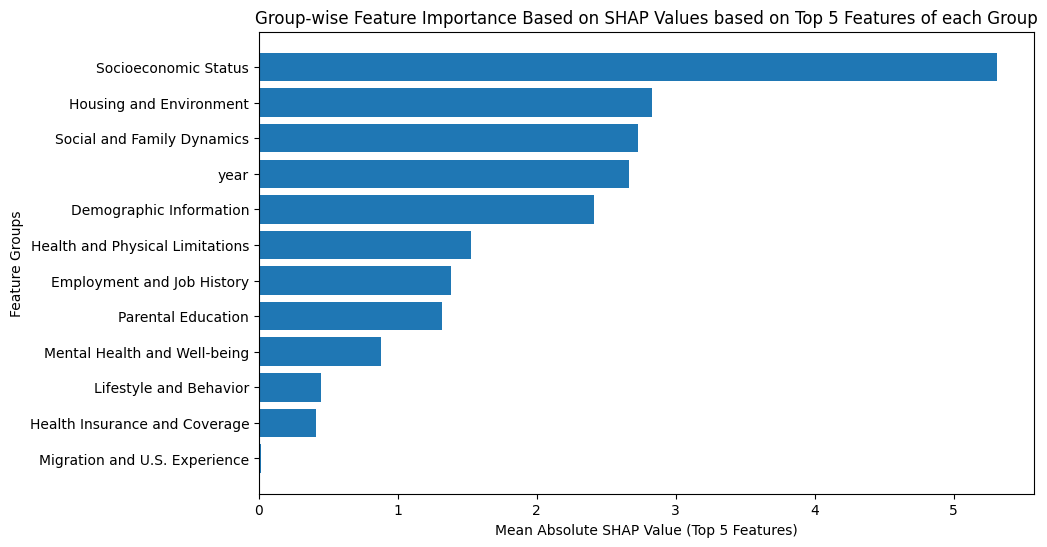

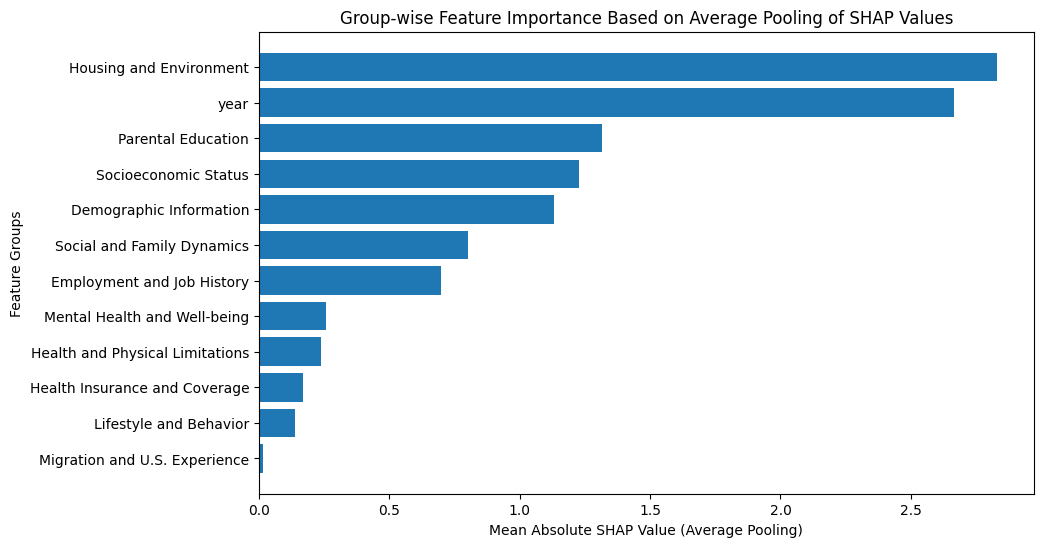

In [80]:
# Make predictions
y_pred = model2.predict(test_df)
y_pred = np.round(y_pred).astype(int)

# Calculate metrics
mse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")


explainer = shap.TreeExplainer(model2)
shap_values_xgb = explainer.shap_values(test_df)

main_df_columns = main_df.columns.to_list()
feature_indices = {
    group: [main_df_columns.index(feature) for feature in features if feature in main_df_columns]
    for group, features in feature_groups.items()
}

# Calculate mean absolute SHAP values for top 5 features in each group
group_means = {}
for group_name, indices in feature_indices.items():
    group_shap_values = shap_values_xgb[:, indices]  # Extract SHAP values for the group
    mean_abs_shap_values = np.mean(np.abs(group_shap_values), axis=0)  # Mean absolute SHAP values
    top_5_mean_abs = np.sort(mean_abs_shap_values)[-5:]  # Top 5 highest values
    group_means[group_name] = np.mean(top_5_mean_abs)  # Mean of the top 5 values
    
# Plot the group importance
group_names = list(group_means.keys())
group_importance = list(group_means.values())

# Sort the groups by their importance values
sorted_groups = sorted(zip(group_importance, group_names))
group_importance, group_names = zip(*sorted_groups)

plt.figure(figsize=(10, 6))
plt.barh(group_names, group_importance)
plt.xlabel("Mean Absolute SHAP Value (Top 5 Features)")
plt.ylabel("Feature Groups")
plt.title("Group-wise Feature Importance Based on SHAP Values based on Top 5 Features of each Group")
plt.show()
    
# Calculate average pooling of the SHAP values for each group
group_avg_pooling = {}
for group_name, indices in feature_indices.items():
    group_shap_values = shap_values_xgb[:, indices]  # Extract SHAP values for the group
    avg_pooling_shap_values = np.mean(np.abs(group_shap_values), axis=1)  # Average pooling (mean of SHAP values for each patient)
    group_avg_pooling[group_name] = np.mean(avg_pooling_shap_values)  # Mean of pooled values for the group


# Plot the group importance
group_names = list(group_avg_pooling.keys())
group_importance = list(group_avg_pooling.values())

# Sort the groups by their importance values
sorted_groups = sorted(zip(group_importance, group_names))
group_importance, group_names = zip(*sorted_groups)

plt.figure(figsize=(10, 6))
plt.barh(group_names, group_importance)
plt.xlabel("Mean Absolute SHAP Value (Average Pooling)")
plt.ylabel("Feature Groups")
plt.title("Group-wise Feature Importance Based on Average Pooling of SHAP Values")
plt.show()

## Random Forest ##

In [81]:
# Step 1: Handle NaN values
# Replace NaN in numerical columns with the mean
num_imputer = SimpleImputer(strategy='mean')
main_df[main_df.select_dtypes(include=['number']).columns] = num_imputer.fit_transform(
    main_df.select_dtypes(include=['number'])
)
test_df[test_df.select_dtypes(include=['number']).columns] = num_imputer.transform(
    test_df.select_dtypes(include=['number'])
)

# Split the data
X_train, X_val, y_train, y_val = train_test_split(main_df, y, test_size=0.001, random_state=42)

# Step 2: Apply Target Encoding
# Initialize TargetEncoder
target_encoder = TargetEncoder()

# Fit the encoder on the training data only
categorical_cols = main_df.select_dtypes(include=['object', 'category']).columns

X_train[categorical_cols] = target_encoder.fit_transform(X_train[categorical_cols], y_train)
X_val[categorical_cols] = target_encoder.transform(X_val[categorical_cols])
test_df[categorical_cols] = target_encoder.transform(test_df[categorical_cols])

# Best parameters for CatBoost
best_params = {
  'max_depth': 30,
  'min_samples_split': 22,
  'min_samples_leaf': 6,
  'max_features': 0.8191960808589205,
  'n_estimators': 97
}

model2 = RandomForestRegressor(**best_params, random_state=42)
model2.fit(X_train, y_train)

/tmp/ipykernel_1696223/2082924176.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df[main_df.select_dtypes(include=['number']).columns] = num_imputer.fit_transform(
/tmp/ipykernel_1696223/2082924176.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[test_df.select_dtypes(include=['number']).columns] = num_imputer.transform(
/tmp/ipykernel_1696223/2082924176.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

RandomForestRegressor(max_depth=30, max_features=0.8191960808589205,
                      min_samples_leaf=6, min_samples_split=22, n_estimators=97,
                      random_state=42)


Mean Squared Error: 41.1945
R^2 Score: 0.5761


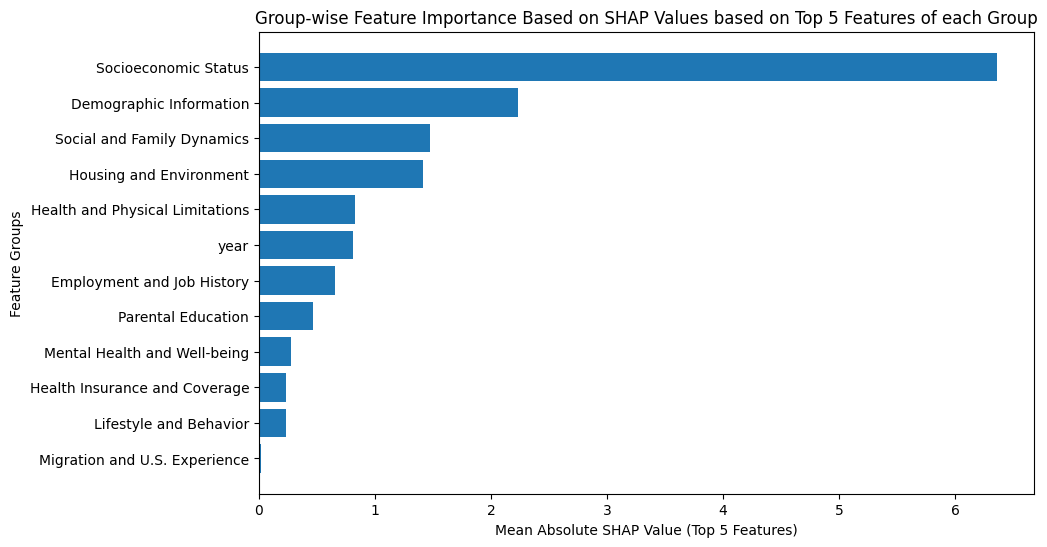

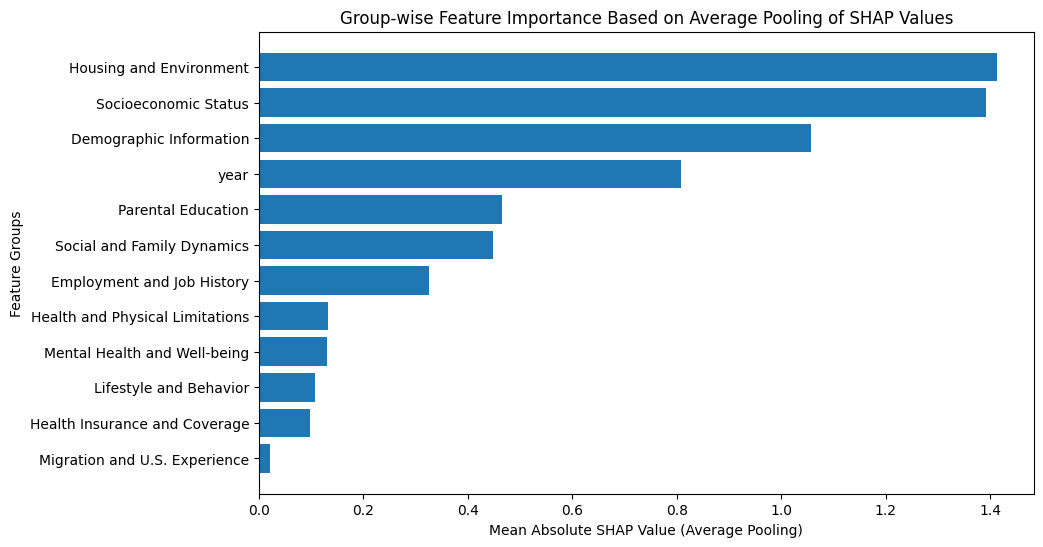

In [82]:
# Make predictions
y_pred = model2.predict(test_df)
y_pred = np.round(y_pred).astype(int)

# Calculate metrics
mse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")


explainer = shap.TreeExplainer(model2)
shap_values_rf = explainer.shap_values(test_df)

main_df_columns = main_df.columns.to_list()
feature_indices = {
    group: [main_df_columns.index(feature) for feature in features if feature in main_df_columns]
    for group, features in feature_groups.items()
}

# Calculate mean absolute SHAP values for top 5 features in each group
group_means = {}
for group_name, indices in feature_indices.items():
    group_shap_values = shap_values_rf[:, indices]  # Extract SHAP values for the group
    mean_abs_shap_values = np.mean(np.abs(group_shap_values), axis=0)  # Mean absolute SHAP values
    top_5_mean_abs = np.sort(mean_abs_shap_values)[-5:]  # Top 5 highest values
    group_means[group_name] = np.mean(top_5_mean_abs)  # Mean of the top 5 values
    
# Plot the group importance
group_names = list(group_means.keys())
group_importance = list(group_means.values())

# Sort the groups by their importance values
sorted_groups = sorted(zip(group_importance, group_names))
group_importance, group_names = zip(*sorted_groups)

plt.figure(figsize=(10, 6))
plt.barh(group_names, group_importance)
plt.xlabel("Mean Absolute SHAP Value (Top 5 Features)")
plt.ylabel("Feature Groups")
plt.title("Group-wise Feature Importance Based on SHAP Values based on Top 5 Features of each Group")
plt.show()
    
# Calculate average pooling of the SHAP values for each group
group_avg_pooling = {}
for group_name, indices in feature_indices.items():
    group_shap_values = shap_values_rf[:, indices]  # Extract SHAP values for the group
    avg_pooling_shap_values = np.mean(np.abs(group_shap_values), axis=1)  # Average pooling (mean of SHAP values for each patient)
    group_avg_pooling[group_name] = np.mean(avg_pooling_shap_values)  # Mean of pooled values for the group


# Plot the group importance
group_names = list(group_avg_pooling.keys())
group_importance = list(group_avg_pooling.values())

# Sort the groups by their importance values
sorted_groups = sorted(zip(group_importance, group_names))
group_importance, group_names = zip(*sorted_groups)

plt.figure(figsize=(10, 6))
plt.barh(group_names, group_importance)
plt.xlabel("Mean Absolute SHAP Value (Average Pooling)")
plt.ylabel("Feature Groups")
plt.title("Group-wise Feature Importance Based on Average Pooling of SHAP Values")
plt.show()

# Combined values

In [83]:
weights = {
    "lgb": 0.25985829,
    "catboost": 0.38508924,
    "xgb": 0.21887303,
    "rf": 0.13617944
}

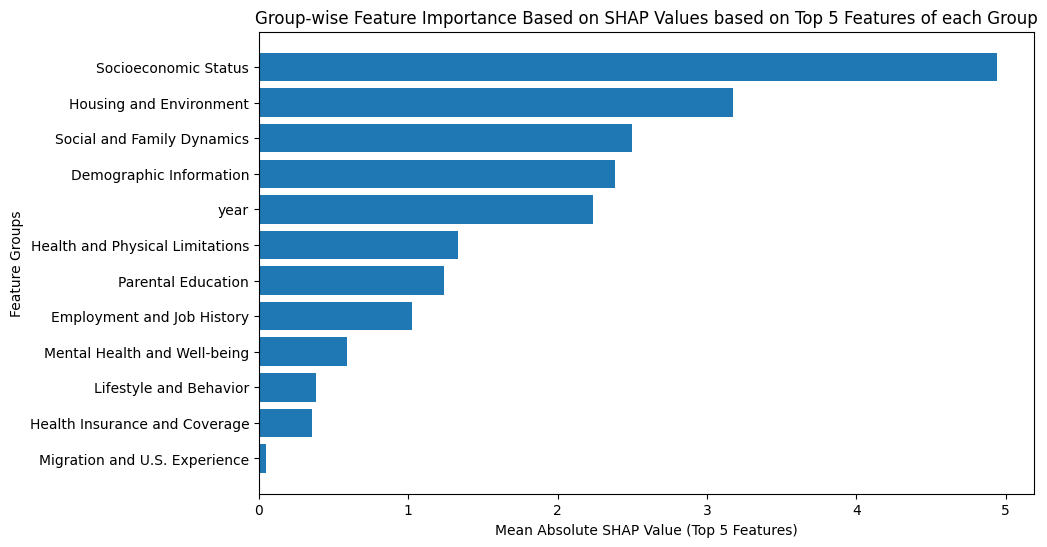

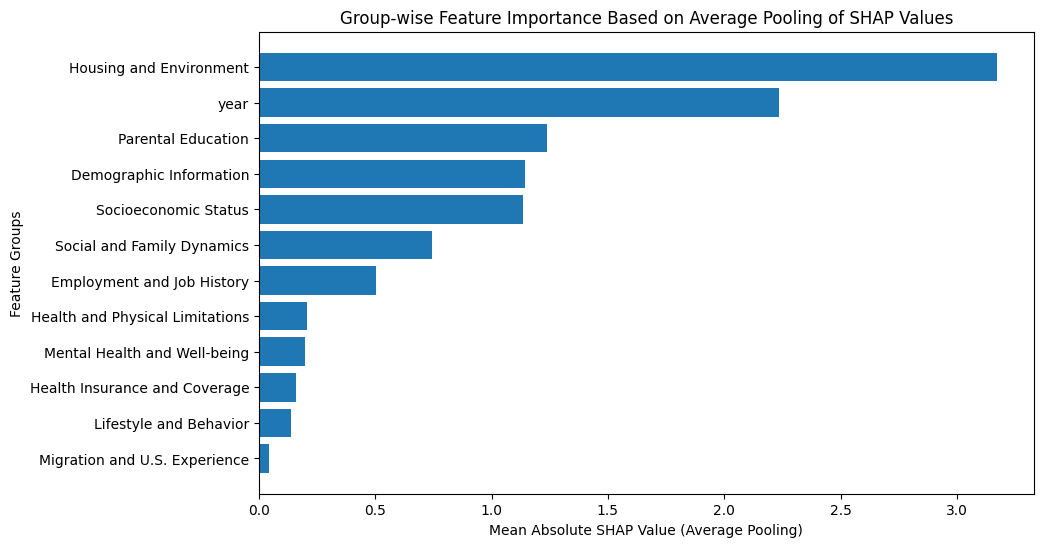

In [84]:
# Combine SHAP values using the weights
combined_shap_values = (
    weights["lgb"] * shap_values_lgb +
    weights["catboost"] * shap_values_catboost +
    weights["xgb"] * shap_values_xgb +
    weights["rf"] * shap_values_rf
)


main_df_columns = main_df.columns.to_list()
feature_indices = {
    group: [main_df_columns.index(feature) for feature in features if feature in main_df_columns]
    for group, features in feature_groups.items()
}

# Calculate mean absolute SHAP values for top 5 features in each group
group_means = {}
for group_name, indices in feature_indices.items():
    group_shap_values = combined_shap_values[:, indices]  # Extract SHAP values for the group
    mean_abs_shap_values = np.mean(np.abs(group_shap_values), axis=0)  # Mean absolute SHAP values
    top_5_mean_abs = np.sort(mean_abs_shap_values)[-5:]  # Top 5 highest values
    group_means[group_name] = np.mean(top_5_mean_abs)  # Mean of the top 5 values
    
# Plot the group importance
group_names = list(group_means.keys())
group_importance = list(group_means.values())

# Sort the groups by their importance values
sorted_groups = sorted(zip(group_importance, group_names))
group_importance, group_names = zip(*sorted_groups)

plt.figure(figsize=(10, 6))
plt.barh(group_names, group_importance)
plt.xlabel("Mean Absolute SHAP Value (Top 5 Features)")
plt.ylabel("Feature Groups")
plt.title("Group-wise Feature Importance Based on SHAP Values based on Top 5 Features of each Group")
plt.show()
    
# Calculate average pooling of the SHAP values for each group
group_avg_pooling = {}
for group_name, indices in feature_indices.items():
    group_shap_values = combined_shap_values[:, indices]  # Extract SHAP values for the group
    avg_pooling_shap_values = np.mean(np.abs(group_shap_values), axis=1)  # Average pooling (mean of SHAP values for each patient)
    group_avg_pooling[group_name] = np.mean(avg_pooling_shap_values)  # Mean of pooled values for the group


# Plot the group importance
group_names = list(group_avg_pooling.keys())
group_importance = list(group_avg_pooling.values())

# Sort the groups by their importance values
sorted_groups = sorted(zip(group_importance, group_names))
group_importance, group_names = zip(*sorted_groups)

plt.figure(figsize=(10, 6))
plt.barh(group_names, group_importance)
plt.xlabel("Mean Absolute SHAP Value (Average Pooling)")
plt.ylabel("Feature Groups")
plt.title("Group-wise Feature Importance Based on Average Pooling of SHAP Values")
plt.show()